In [32]:
import numpy as np
from scipy import stats
import pandas as pd
from scipy import interpolate
from scipy.signal import welch
from biosppy.signals import eda
import os, json

import neurokit2 as nk
import matplotlib.pyplot as plt

In [33]:
#change work directory to Code
workDir = 'D:/LAB/放鬆-三總/Relaxing/分析'
os.chdir(workDir)

In [34]:
sampleRate = 256
amp = 0.001

feature_names=['diff' ,'startle', 'duration', 
            'average_filter', 'mini_scr', 'maxi_scr', 
            'average_scr', 'std_scr', 'average_ampl',
            'std_ampl']

lable_names = ['addictLabel', 'stateLabel']

data_name = ['data_name']

inputPath = "Data/GSR_Sort/"
featureOutputPath = "Feature/"

In [35]:
def feature_Cal(resData, sampleRate, dataCol = "GSRdata"):
    eda_signal = resData[dataCol]
    signals, info = nk.eda_process(resData[dataCol], sampling_rate=sampleRate)
    cleaned = signals["EDA_Clean"]
    features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

    plt.rcParams['figure.figsize'] = [15, 5]
    # plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

    # data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=sampleRate)
    # data["EDA_Raw"] = eda_signal  # Add raw signal
    # data.plot()

    plot = nk.eda_plot(signals)

In [36]:
def CalGSRFeatures(filePath, sampleRate, output = False):
    
    dataList = os.listdir(filePath)

    for dataName in dataList:
        # N1_VR_1_PreTest_Skin
        dataInfo = dataName[:-4].split('_')
        
        data = pd.read_csv("%s%s"%(filePath, dataName), index_col=0, names=['TimeStamp', 'GSRdata'])
        # print(data[0:5])
        
        features = feature_Cal(data, sampleRate, 'GSRdata')


c:\Users\WMlab\.pyenv\pyenv-win\versions\3.10.10\lib\site-packages\neurokit2\eda\eda_plot.py:50: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


ValueError: Length of values (263) does not match length of index (264)

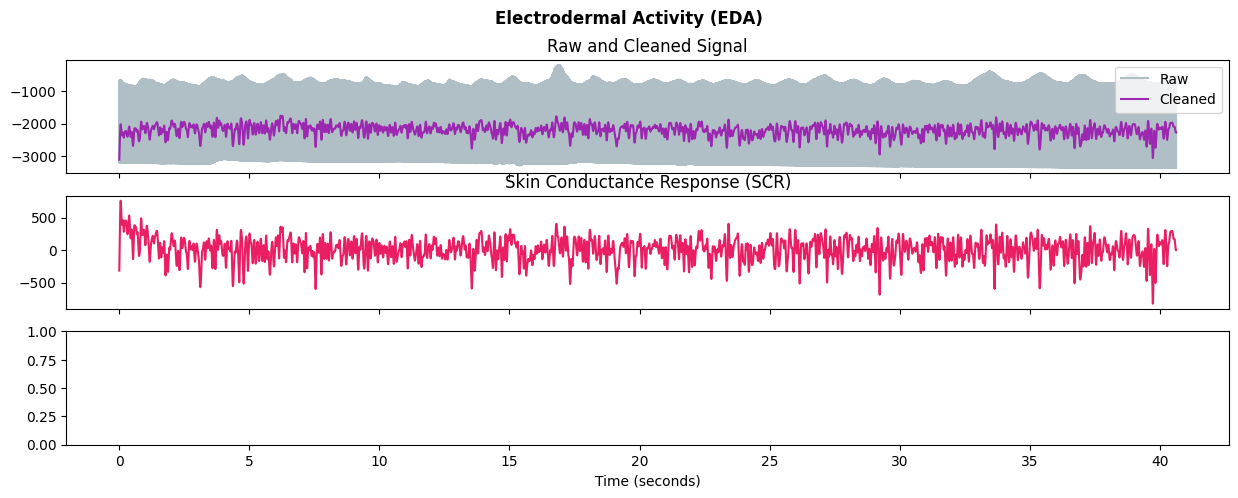

In [37]:
feature = CalGSRFeatures(inputPath, sampleRate=sampleRate, output=False)
